In [ ]:
import pandas as pd
import numpy as np
import re
import nltk
import seaborn as sns
import matplotlib.pyplot as plt

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
### check length of each post

count    137627.000000
mean         63.523872
std          78.690871
min           1.000000
25%          17.000000
50%          39.000000
75%          80.000000
max        1578.000000
Name: body, dtype: float64


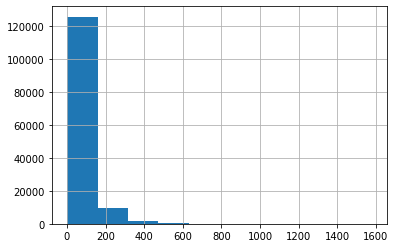

In [ ]:
lens = loseit2.body.str.split(' ').apply(lambda x: len(x))
print(lens.describe())
lens.hist()

In [ ]:
### get an initial impression of the top 10 topic in "unwelcome" and "supportive" classes

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation, NMF
vectorizer = CountVectorizer(stop_words=stops)
model = vectorizer.fit(loseit2[loseit2['score']<=0]['body'])
docs = vectorizer.transform(loseit2[loseit2['score']<=0]['body'])
lda = LatentDirichletAllocation(10)
lda.fit(docs)
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = "Topic #%d: " % topic_idx
        message += " ".join([(feature_names[i])
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
    print()
    
print_top_words(lda,vectorizer.get_feature_names(),10)

Topic #0: gt would think fat want even go use work people
Topic #1: weight fat muscle lose body get day week loss much
Topic #2: weight loss get like people would way great job still
Topic #3: weight like eating eat one try people would time make
Topic #4: people fat like want good get way would one know
Topic #5: people like amp one even know x200b time much eat
Topic #6: calories eat day eating food weight calorie lose body less
Topic #7: weight eat eating think get like food time day also
Topic #8: keto like good diet really people eat food get think
Topic #9: like weight diet eat make work low protein time much



In [ ]:
vectorizer = CountVectorizer(stop_words=stops)
model = vectorizer.fit(loseit2[loseit2['score']>=1]['body'])
docs = vectorizer.transform(loseit2[loseit2['score']<=0]['body'])
lda = LatentDirichletAllocation(10)
lda.fit(docs)
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = "Topic #%d: " % topic_idx
        message += " ".join([(feature_names[i])
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
    print()
    
print_top_words(lda,vectorizer.get_feature_names(),10)

Topic #0: women need doctor men money fat nutrition get rude taught
Topic #1: ok de gt die een wide unfair jason fung interest
Topic #2: glycogen 100 breast raw ie chicken olive 100g journals likes
Topic #3: hypertrophy cinnamon term respect nutrition gainit results exrx licensed wow
Topic #4: weight like eat calories eating people day get food fat
Topic #5: skin loose loss weight surgery gov wiki tops ncbi nlm
Topic #6: fructose sugar pm myfitnesspal glucose english minimal laid business harsh
Topic #7: chicken rice meat chocolate fish cheese potatoes salad cholesterol protein
Topic #8: joke lol pizza gross wish daughter report indeed reaction behavior
Topic #9: lmao fatlogic sister company younger obese measurement deserts disciplined disgusting



In [ ]:
### generate wordcloud of the two classes

In [ ]:
!pip install wordcloud

In [ ]:
from wordcloud import WordCloud, STOPWORDS

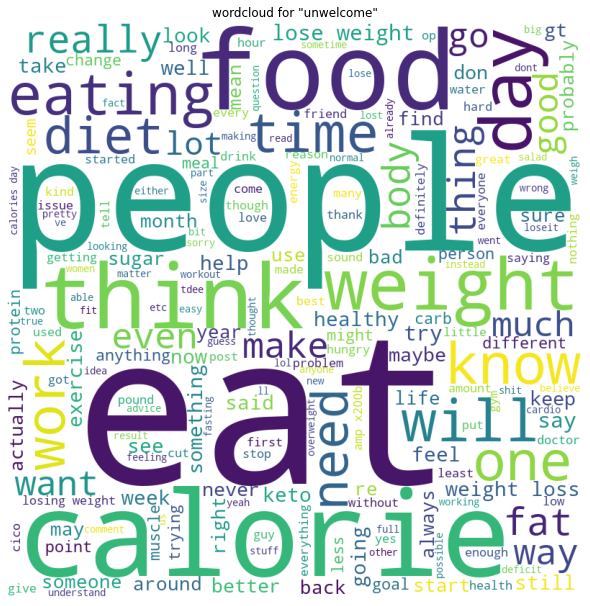

In [ ]:
## wordcloud for 'unwelcome'
comment_words = '' 
stopwords = set(STOPWORDS)

for val in loseit2[loseit2['score']<=0]['body']: 
      
    val = str(val) 
  
    tokens = val.split() 
      
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
                         
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.title('wordcloud for "unwelcome"')  
plt.show() 

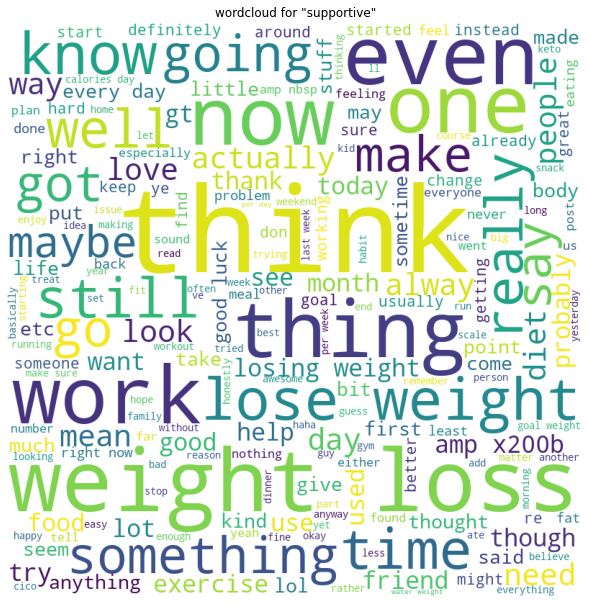

In [ ]:
## wordcloud for 'supportive'

comment_words = '' 
stopwords = set(STOPWORDS)

for val in loseit2[loseit2['score']>=1]['body']: 
      
    val = str(val) 
  
    tokens = val.split() 
      
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
                       
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.title('wordcloud for "supportive"') 
plt.show()